In [ ]:
# Exercise with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/justmarkham/DAT8/blob/master/data/bank-additional.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [54]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bank-additional.csv'
bank = pd.read_csv(url, sep=';')
bank.head()

#bank.groupby('job').campaign.agg(['mean'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

count    4119.000000
mean        2.537266
std         2.568159
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64

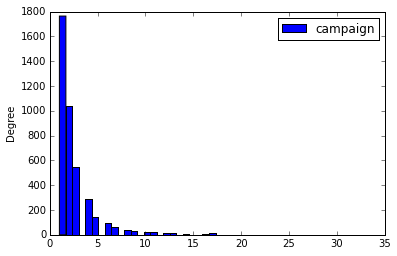

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
bank.plot(kind='hist', y='campaign', x='age', bins=50)
bank.campaign.describe()

In [3]:
# list all columns (for reference)
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

### X (features)

In [117]:
#bank.groupby('housing').describe()
bank['housing2'] = bank.housing[(bank.housing=='yes') | (bank.housing=='no')]
bank['housing2'] = bank.housing2.map({'no':0, 'yes':1, 'unknown':0})

#bank.groupby('housing2').age.describe()
#filter out rows where housing = unknown

In [123]:
feature_cols = ['age','housing2','campaign']
bank.dropna(inplace=True)
X = bank[feature_cols]

### y (response)

In [124]:
# convert the response to numeric values and store as a new column
bank['outcome'] = bank.y.map({'no':0, 'yes':1})
y = bank.outcome

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [131]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [133]:
print metrics.accuracy_score(y_test, y_pred)

0.895418326693
